Вариант 6:
$$e^z = iz + 1$$

Система:
$$
\begin{cases}
F_1(x,\, y) = e^x \cos(y) + y - 1 = 0\\
F_2(x,\, y) = e^x \sin(y) - x = 0\\
\end{cases}
$$

Получил следующие производные (для матрицы Якоби):
$$
\begin{cases}
F_{1,x}(x,\, y) = e^x \cos(y) \\
F_{1,y}(x,\, y) = 1 - e^x \sin(y) \\
F_{2,x}(x,\, y) = e^x \sin(y) - 1 \\
F_{2,y}(x,\, y) = e^x \cos(y) \\
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

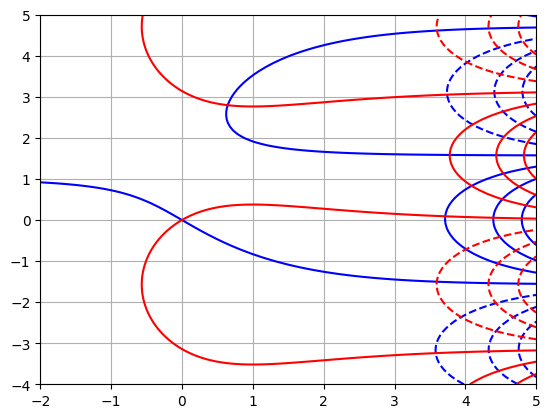

In [25]:
n = 100
x = np.linspace(-2, 5, n)
y = np.linspace(-4, 5, n)
X, Y = np.meshgrid(x, y)
Z_1 = np.exp(X) * np.cos(Y) + Y - 1
Z_2 = np.exp(X) * np.sin(Y) - X
fig, ax = plt.subplots()
ax.contour(X, Y, Z_1, colors='b')
ax.contour(X, Y, Z_2, colors='r')
ax.grid(True)

Первое приближение: (1, 3)

In [5]:
x = [1]
y = [3]
F_1 = lambda x, y: np.exp(x) * math.cos(y) + y - 1
F_2 = lambda x, y: np.exp(x) * math.sin(y) - x
F_1x = lambda x, y: np.exp(x) * math.cos(y)
F_1y = lambda x, y: 1 - np.exp(x) * np.sin(y)
F_2x = lambda x, y: np.exp(x) * math.sin(y) - 1
F_2y = lambda x, y: np.exp(x) * math.cos(y)

err = 10 ** -8
while True:
    xn_yn = np.array([[x[-1]], [y[-1]]])
    matrix_with_derivs = np.array([[F_1x(x[-1], y[-1]), F_1y(x[-1], y[-1])], [F_2x(x[-1], y[-1]), F_2y(x[-1], y[-1])]])
    F1_F2 = np.array([[F_1(x[-1], y[-1])], [F_2(x[-1], y[-1])]])
    result = xn_yn - np.matmul(np.linalg.inv(matrix_with_derivs), F1_F2)
    x.append(result[0][0])
    y.append(result[1][0])
    if max(abs(x[-1] - x[-2]), abs(y[-1] - y[-2])) < err:
        break

print("Приближения:")
for i in range(len(x)):
    print(f'({x[i]}, {y[i]})')
print()

print("Подставим последнее приближение в F_1 и F_2:")
print(f'F_1 = {F_1(x[-1], y[-1])}')
print(f'F_2 = {F_2(x[-1], y[-1])}')

Приближения:
(1, 3)
(0.7061485734386364, 2.8382554910715467)
(0.6485518289434054, 2.7978245890853657)
(0.6465229956123808, 2.796071574827752)
(0.6465206229126135, 2.7960686662942282)
(0.6465206229101801, 2.796068666287297)

Подставим последнее приближение в F_1 и F_2:
F_1 = 0.0
F_2 = -3.3306690738754696e-16
